## DataCo SMART SUPPLY CHAIN FOR BIG DATA ANALYSIS

A DataSet of Supply Chains used by the company DataCo Global was used for the analysis. Dataset of Supply Chain , which allows the use of Machine Learning Algorithms and R Software.

Areas of important registered activities : Provisioning , Production , Sales , Commercial Distribution.It also allows the correlation of Structured Data with Unstructured Data for knowledge generation.

<b>Type Data :</b> \
Structured Data : DataCoSupplyChainDataset.csv \
Unstructured Data : tokenized_access_logs.csv (Clickstream)

<b>Types of Products :</b> Clothing , Sports , and Electronic Supplies

Additionally it is attached in another file called DescriptionDataCoSupplyChain.csv, the description of each of the variables of the DataCoSupplyChainDatasetc.csv.

### Goal
The goal of this analysis is to predict whether the package delivery gonna be late or not (variable Late_delivery_risk)

In [1]:
# K Nearest Neighbor
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import GridSearchCV
import lime
from lime import lime_tabular

import logging
import os
import warnings
from urllib.parse import urlparse
import mlflow
import mlflow.sklearn
from mlflow.models import infer_signature

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', None)
logging.basicConfig(level=logging.WARN)
logger = logging.getLogger(__name__)

In [2]:
data_raw = pd.read_csv("D:/Kuliah/semester_3/kecerdasan_buatan/Github/Artificial_Inteligence/Pertemuan_4/DataCoSupplyChainDataset.csv", encoding="ISO-8859-1")
data_unstructured = pd.read_csv("D:/Kuliah/semester_3/kecerdasan_buatan/Github/Artificial_Inteligence/Pertemuan_4/tokenized_access_logs.csv", encoding="ISO-8859-1")
data_desc = pd.read_csv("D:/Kuliah/semester_3/kecerdasan_buatan/Github/Artificial_Inteligence/Pertemuan_4/DescriptionDataCoSupplyChain.csv", encoding="ISO-8859-1")

In [3]:
# Column Description
data_desc

,FIELDS,DESCRIPTION
0,Type,: Type of transaction made
1,Days for shipping (real),: Actual shipping days of the purchased product
2,Days for shipment (scheduled),: Days of scheduled delivery of the purchased product
3,Benefit per order,: Earnings per order placed
4,Sales per customer,: Total sales per customer made per customer
5,Delivery Status,": Delivery status of orders: Advance shipping , Late delivery , Shipping canceled , Shipping on time"
6,Late_delivery_risk,": Categorical variable that indicates if sending is late (1), it is not late (0)."
7,Category Id,: Product category code
8,Category Name,: Description of the product category
9,Customer City,: City where the customer made the purchase


In [4]:
data_raw.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [5]:
data_unstructured.head()

,Product,Category,Date,Month,Hour,Department,ip,url
0,adidas Brazuca 2017 Official Match Ball,baseball & softball,9/1/2017 6:00,Sep,6,fitness,37.97.182.65,/department/fitness/category/baseball%20&%20softball/product/adidas%20Brazuca%202017%20Official%20Match%20Ball
1,The North Face Women's Recon Backpack,hunting & shooting,9/1/2017 6:00,Sep,6,fan shop,206.56.112.1,/department/fan%20shop/category/hunting%20&%20shooting/product/The%20North%20Face%20Women's%20Recon%20Backpack
2,adidas Kids' RG III Mid Football Cleat,featured shops,9/1/2017 6:00,Sep,6,apparel,215.143.180.0,/department/apparel/category/featured%20shops/product/adidas%20Kids'%20RG%20III%20Mid%20Football%20Cleat
3,Under Armour Men's Compression EV SL Slide,electronics,9/1/2017 6:00,Sep,6,footwear,206.56.112.1,/department/footwear/category/electronics/product/Under%20Armour%20Men's%20Compression%20EV%20SL%20Slide
4,Pelican Sunstream 100 Kayak,water sports,9/1/2017 6:01,Sep,6,fan shop,136.108.56.242,/department/fan%20shop/category/water%20sports/product/Pelican%20Sunstream%20100%20Kayak


In [6]:
data_raw.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


Missing data is found on Customer Zipcode, Order Zipcode, and Product Description. Since those columns most likely wasnt going in training data, this can be ignored.

In [7]:
data_raw.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [8]:
data_raw.dtypes 

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Delivery Status                   object
Late_delivery_risk                 int64
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Email                    object
Customer Fname                    object
Customer Id                        int64
Customer Lname                    object
Customer Password                 object
Customer Segment                  object
Customer State                    object
Customer Street                   object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Latitude                         float64
Longitude                        float64
Market          

In [9]:
col_to_object = ["Customer Id", "Customer Zipcode", "Department Id", "Order Customer Id", "Order Id", "Order Item Cardprod Id", 
                 "Order Item Id", "Product Card Id", "Product Category Id", "Product Status", "Late_delivery_risk", "Category Id", 
                 "Latitude", "Longitude", "Order Zipcode", "Product Description"]
col_to_date =  ["order date (DateOrders)", "shipping date (DateOrders)"]

data_1 = data_raw
data_1[col_to_object] = data_1[col_to_object].astype(str)
data_1[col_to_date] = data_1[col_to_date].apply(pd.to_datetime, format='%m/%d/%Y %H:%M')

# Descriptive Statistics

In [10]:
print(data_1.describe(include='all'))

C:\Users\PC\AppData\Local\Temp\ipykernel_13956\3281304271.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(data_1.describe(include='all'))


          Type  Days for shipping (real)  Days for shipment (scheduled)  \
count   180519             180519.000000                  180519.000000   
unique       4                       NaN                            NaN   
top      DEBIT                       NaN                            NaN   
freq     69295                       NaN                            NaN   
first      NaN                       NaN                            NaN   
last       NaN                       NaN                            NaN   
mean       NaN                  3.497654                       2.931847   
std        NaN                  1.623722                       1.374449   
min        NaN                  0.000000                       0.000000   
25%        NaN                  2.000000                       2.000000   
50%        NaN                  3.000000                       4.000000   
75%        NaN                  5.000000                       4.000000   
max        NaN           

C:\Users\PC\AppData\Local\Temp\ipykernel_13956\3281304271.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(data_1.describe(include='all'))


Since SVM is relatively demanding algorithm in case of using this large dataset, lets do stratified sampling based on Late_delivery_risk

In [11]:
#data_1 = data_1.groupby('Late_delivery_risk', group_keys=False).apply(lambda x: x.sample(frac=0.1))

# Bar Chart

In [12]:
data_cat = data_1.select_dtypes(include=['object'])
data_cat.head()

,Type,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Id,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Status,Shipping Mode
0,DEBIT,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.2514534,-66.03705597,Pacific Asia,Bekasi,Indonesia,20755,77202,1360,180517,Southeast Asia,Java Occidental,COMPLETE,nan,1360,73,nan,http://images.acmesports.sports/Smart+watch,Smart watch,0,Standard Class
1,TRANSFER,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.27945137,-66.0370636,Pacific Asia,Bikaner,India,19492,75939,1360,179254,South Asia,Rajastán,PENDING,nan,1360,73,nan,http://images.acmesports.sports/Smart+watch,Smart watch,0,Standard Class
2,CASH,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.29223251,-121.881279,Pacific Asia,Bikaner,India,19491,75938,1360,179253,South Asia,Rajastán,CLOSED,nan,1360,73,nan,http://images.acmesports.sports/Smart+watch,Smart watch,0,Standard Class
3,DEBIT,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.12594605,-118.2910156,Pacific Asia,Townsville,Australia,19490,75937,1360,179252,Oceania,Queensland,COMPLETE,nan,1360,73,nan,http://images.acmesports.sports/Smart+watch,Smart watch,0,Standard Class
4,PAYMENT,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.25376892,-66.03704834,Pacific Asia,Townsville,Australia,19489,75936,1360,179251,Oceania,Queensland,PENDING_PAYMENT,nan,1360,73,nan,http://images.acmesports.sports/Smart+watch,Smart watch,0,Standard Class


In [13]:
data_cat.nunique()

Type                           4
Delivery Status                4
Late_delivery_risk             2
Category Id                   51
Category Name                 50
Customer City                563
Customer Country               2
Customer Email                 1
Customer Fname               782
Customer Id                20652
Customer Lname              1109
Customer Password              1
Customer Segment               3
Customer State                46
Customer Street             7458
Customer Zipcode             996
Department Id                 11
Department Name               11
Latitude                   11250
Longitude                   4487
Market                         5
Order City                  3597
Order Country                164
Order Customer Id          20652
Order Id                   65752
Order Item Cardprod Id       118
Order Item Id             180519
Order Region                  23
Order State                 1089
Order Status                   9
Order Zipc

In [14]:
retained_cat_col = ["Type", "Delivery Status", "Shipping Mode", "Late_delivery_risk"]
data_cat = data_cat[retained_cat_col]
data_cat.head()

,Type,Delivery Status,Shipping Mode,Late_delivery_risk
0,DEBIT,Advance shipping,Standard Class,0
1,TRANSFER,Late delivery,Standard Class,1
2,CASH,Shipping on time,Standard Class,0
3,DEBIT,Advance shipping,Standard Class,0
4,PAYMENT,Advance shipping,Standard Class,0


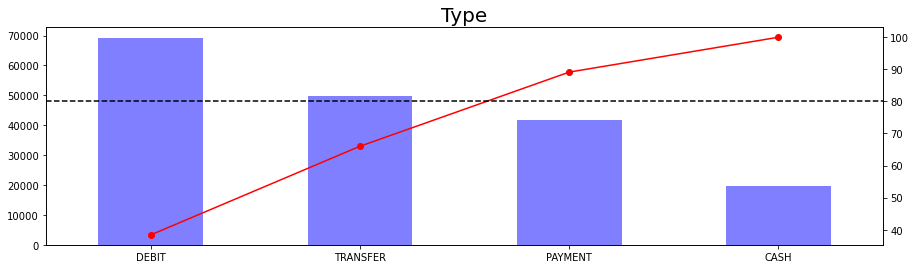

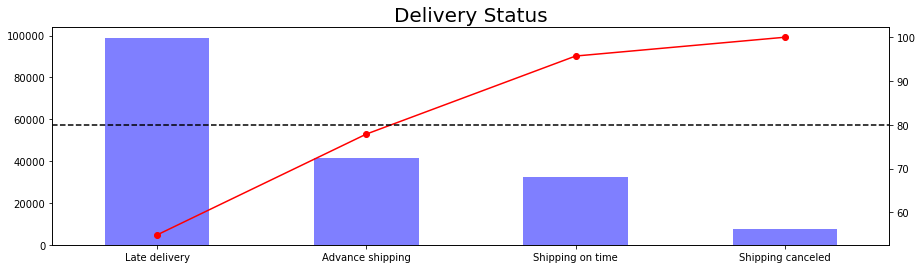

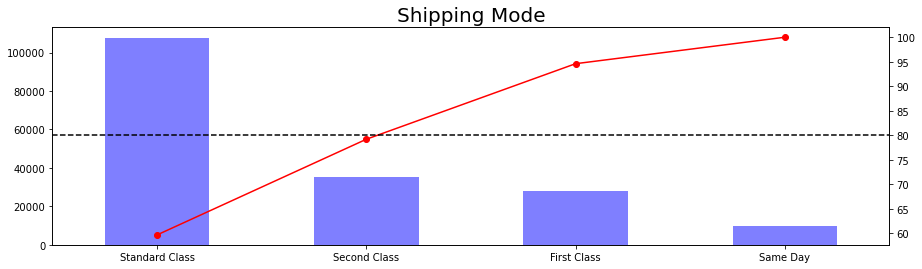

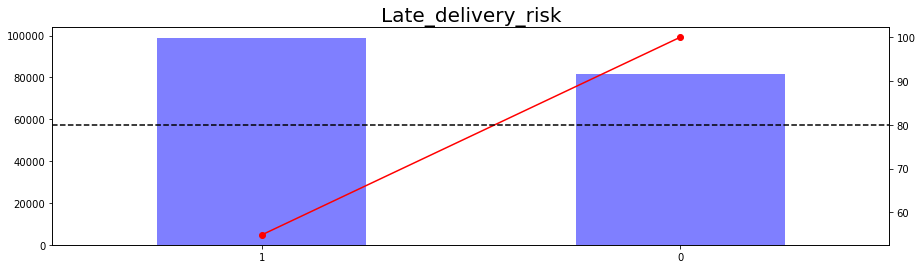

In [15]:
for column in data_cat:
    plt.figure(figsize=(15,4))
    
    # Calculate value counts and sort by descending order
    value_counts = data_cat[column].value_counts().sort_values(ascending=False)
    
    # Create bar chart
    value_counts.plot(kind='bar', color='blue', alpha=0.5)
    
    # Calculate cumulative sums and convert to percentage of total
    cumulative_sums = value_counts.cumsum() / value_counts.sum() * 100
    
    # Create Pareto line
    cumulative_sums.plot(kind='line', marker='o', color='red', secondary_y=True)

    # Add dotted line at 80%
    plt.axhline(y=80, color='k', linestyle='--')
    
    plt.title(column, fontdict={'fontsize': 20})
    plt.show()

From the visualization

a. about 80% type of transaction made consist of DEBIT, TRANSFER, and PAYMENT \
b. about 80% delivery status consist of Late Delivery, Advance Shipping, and Shipping on Time \
c. about 80% shipping mode used were Standard Class and Second Class \
d. Late delivery risk, which is the label we want to predict were almost equal in occurence

TODO-> bisa eksplorasi gimana statistiknya kalau Late delivery risk nya 0 dan 1

# Box Plot

In [16]:
data_num = data_1.select_dtypes(exclude=['object', 'datetime64[ns]'])
data_num.head()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Price
0,3,4,91.250000,314.640015,13.110000,0.04,327.75,0.29,1,327.75,314.640015,91.250000,327.75
1,5,4,-249.089996,311.359985,16.389999,0.05,327.75,-0.80,1,327.75,311.359985,-249.089996,327.75
2,4,4,-247.779999,309.720001,18.030001,0.06,327.75,-0.80,1,327.75,309.720001,-247.779999,327.75
3,3,4,22.860001,304.809998,22.940001,0.07,327.75,0.08,1,327.75,304.809998,22.860001,327.75
4,2,4,134.210007,298.250000,29.500000,0.09,327.75,0.45,1,327.75,298.250000,134.210007,327.75


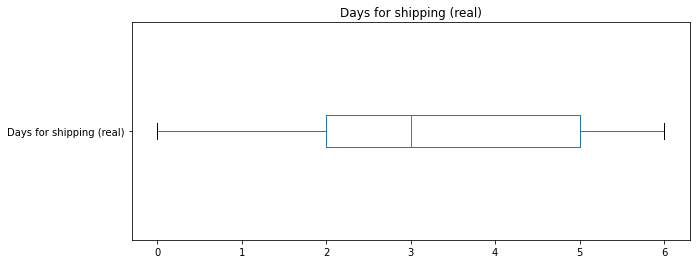

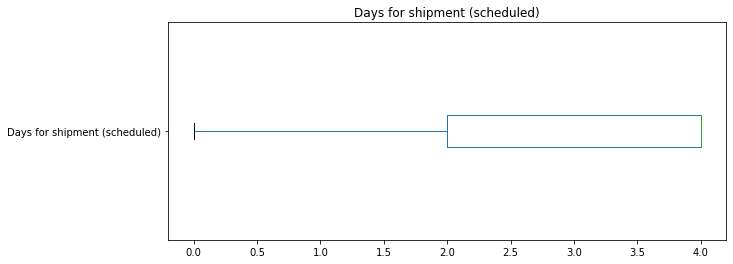

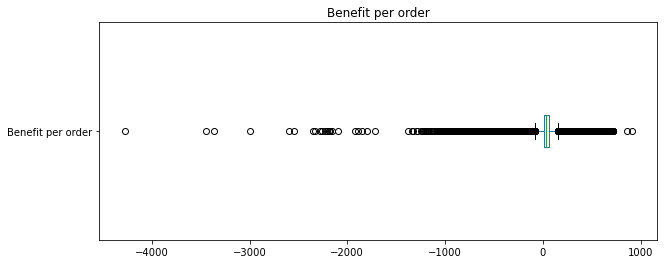

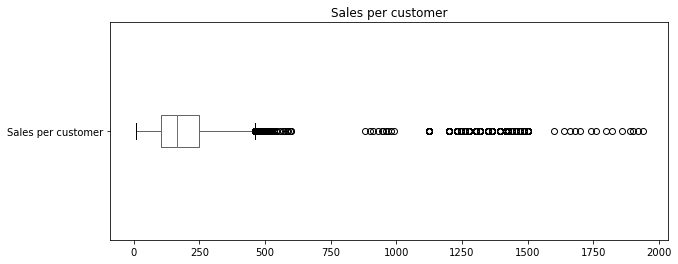

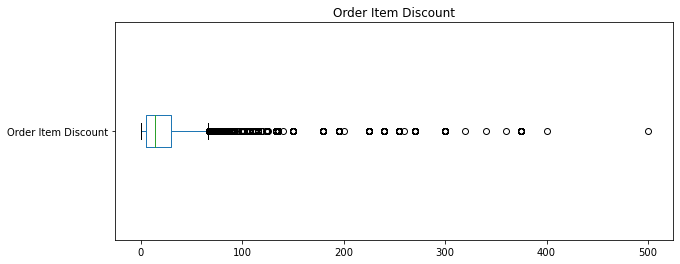

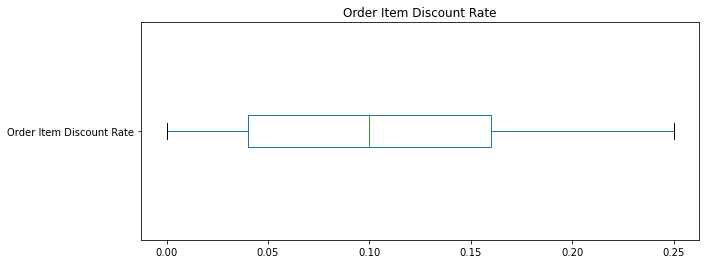

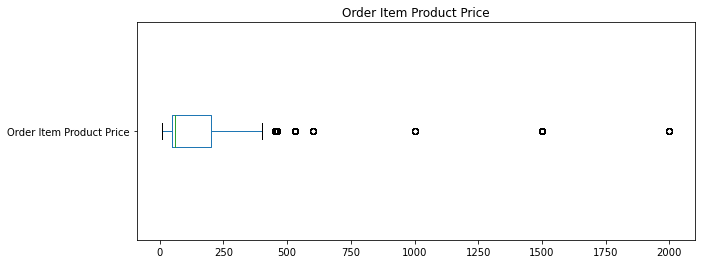

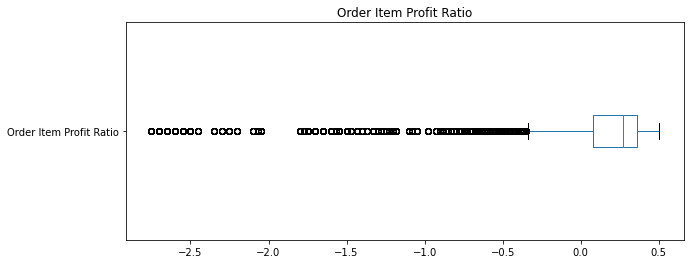

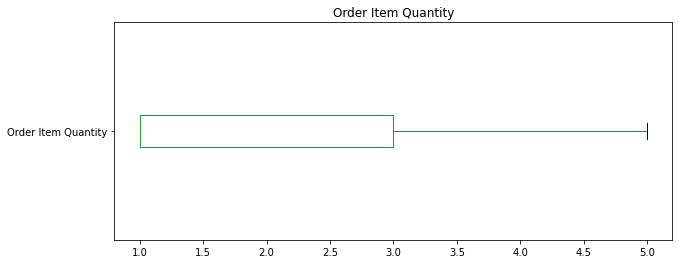

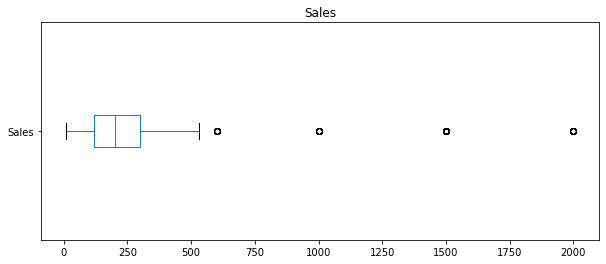

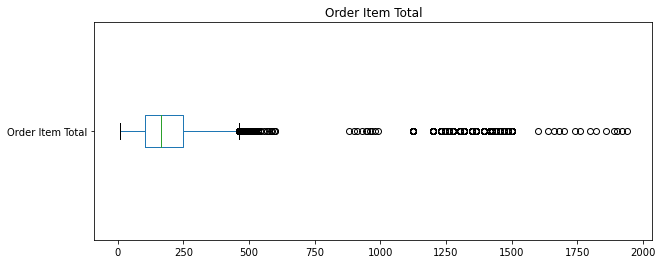

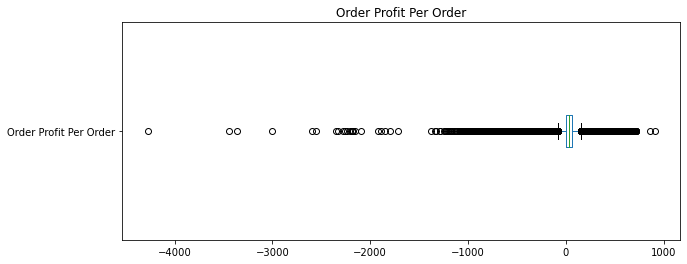

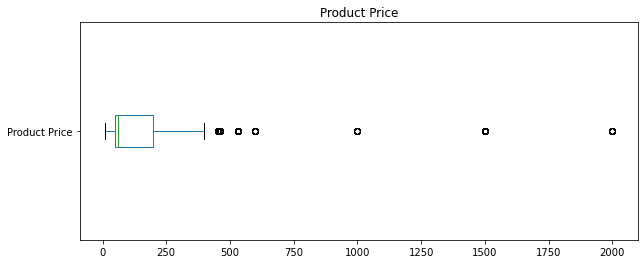

In [17]:
for column in data_num:
    plt.figure(figsize=(10,4))
    data_num.boxplot([column], vert=False, grid=False)
    plt.title(column)
    plt.show()

From boxplot created above, several point can be derived:

a. Outliers exist in Benefit per order, Sales per customer, Order Item Discount, Order Item Product Price, Order Item Profit Ratio, Sales, Order Item Total, Order Profit Per Order, Product Price

# Data Preprocessing

The curse of dimensionality means that KNN performs best with a low number of features. When the number of features increases, then it requires more data. When there’s more data, it creates an overfitting problem because no one knows which piece of noise will contribute to the model. KNN performs better with low dimensionality (as demonstrated by a study by Gu and Shao in 2014). 

Before starting with the KNN model, consider preprocessing the data. All attributes are of type int64 and there’s no null value. We also need to segregate the data into training and testing splits.

Furthermore, Euclidean distance is very sensitive to magnitudes, hence features in the dataset that has high magnitudes will always weigh more than their counterparts with low magnitudes.

Source:
https://neptune.ai/blog/knn-algorithm-explanation-opportunities-limitations

In [18]:
rand_seed = 123
np.random.seed(rand_seed)

In [19]:
data_prep = data_num
data_prep["Late_delivery_risk"] = data_cat["Late_delivery_risk"]
data_prep.head()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Price,Late_delivery_risk
0,3,4,91.250000,314.640015,13.110000,0.04,327.75,0.29,1,327.75,314.640015,91.250000,327.75,0
1,5,4,-249.089996,311.359985,16.389999,0.05,327.75,-0.80,1,327.75,311.359985,-249.089996,327.75,1
2,4,4,-247.779999,309.720001,18.030001,0.06,327.75,-0.80,1,327.75,309.720001,-247.779999,327.75,0
3,3,4,22.860001,304.809998,22.940001,0.07,327.75,0.08,1,327.75,304.809998,22.860001,327.75,0
4,2,4,134.210007,298.250000,29.500000,0.09,327.75,0.45,1,327.75,298.250000,134.210007,327.75,0


In [20]:
data_prep.isna().sum()

Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Product Price         0
Order Item Profit Ratio          0
Order Item Quantity              0
Sales                            0
Order Item Total                 0
Order Profit Per Order           0
Product Price                    0
Late_delivery_risk               0
dtype: int64

In [21]:
scaler = MinMaxScaler(feature_range=(0,1))
# Fit and transform the data and convert it back to a DataFrame in one step
data_prep = pd.DataFrame(scaler.fit_transform(data_prep), columns=data_prep.columns)

# Now you can use .head()
data_prep.head()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Price,Late_delivery_risk
0,0.500000,1.0,0.841800,0.158939,0.02622,0.16,0.159678,0.935385,0.0,0.159678,0.158939,0.841800,0.159678,0.0
1,0.833333,1.0,0.776183,0.157242,0.03278,0.20,0.159678,0.600000,0.0,0.159678,0.157242,0.776183,0.159678,1.0
2,0.666667,1.0,0.776435,0.156393,0.03606,0.24,0.159678,0.600000,0.0,0.159678,0.156393,0.776435,0.159678,0.0
3,0.500000,1.0,0.828614,0.153853,0.04588,0.28,0.159678,0.870769,0.0,0.159678,0.153853,0.828614,0.159678,0.0
4,0.333333,1.0,0.850082,0.150458,0.05900,0.36,0.159678,0.984615,0.0,0.159678,0.150458,0.850082,0.159678,0.0


In [22]:
# Separate features and target
X = data_prep.drop(["Days for shipping (real)","Late_delivery_risk"], axis=1)
y = data_prep["Late_delivery_risk"].astype(int)

In [23]:
# Assuming X is your feature matrix and y are your labels
# Generate a random sample for training, testing, and validating
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=rand_seed, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=rand_seed, stratify=y_temp)

<b>K Nearest Neighbor (KNN)</b> is a very simple, easy-to-understand, and versatile machine learning algorithm. It’s used in many different areas, such as handwriting detection, image recognition, and video recognition. KNN is most useful when labeled data is too expensive or impossible to obtain, and it can achieve high accuracy in a wide variety of prediction-type problems.

KNN is a simple algorithm, based on the local minimum of the target function which is used to learn an unknown function of desired precision and accuracy. The algorithm also finds the neighborhood of an unknown input, its range or distance from it, and other parameters. It’s based on the principle of “information gain”—the algorithm finds out which is most suitable to predict an unknown value. 

KNeighborsClassifier implements learning based on the nearest neighbors of each query point, where is an integer value specified by the user. 
The k-neighbors classification in KNeighborsClassifier is the most commonly used technique. The optimal choice of the value k is highly data-dependent: in general a larger k suppresses the effects of noise, but makes the classification boundaries less distinct.

Source: \
https://neptune.ai/blog/knn-algorithm-explanation-opportunities-limitations \
https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification

In [24]:
# Train a KNN

# Define the parameter grid
param_grid = {
    'n_neighbors': [5, 6, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto'],  
    'leaf_size': [10,20,30],  
    'p': [2],
    'n_jobs': [-1]
}


# Create a base model
knn_base = KNeighborsClassifier()

#### Instantiate the grid search model
grid_search = GridSearchCV(estimator=knn_base, param_grid=param_grid,
                           cv=2, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print("Best parameters: ", best_params)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
Best parameters:  {'algorithm': 'auto', 'leaf_size': 10, 'n_jobs': -1, 'n_neighbors': 6, 'p': 2, 'weights': 'uniform'}


In [25]:
def eval_metrics(actual, pred):
    accuracy = accuracy_score(actual, pred)
    f1 = f1_score(actual, pred)
    recall = recall_score(actual, pred)
    precision = precision_score(actual, pred)
    return accuracy, f1, recall, precision

In [26]:
mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment("Order_Delivery_2")

KeyboardInterrupt: 

In [ ]:
if __name__ == "__main__":
    warnings.filterwarnings("ignore")
    rand_seed = 123
    np.random.seed(rand_seed)

    with mlflow.start_run(run_name="order_delivery_knn_1"):
        clf = KNeighborsClassifier(leaf_size = 10, n_jobs=-1, n_neighbors=6, p=2, weights='uniform')
        clf.fit(X_train, y_train)
    
        # Test SVM Model on Test Data
        y_pred = clf.predict(X_test)
        (accuracy, f1, recall, precision) = eval_metrics(y_test, y_pred)

        print(f"Accuracy: {accuracy}")
        print(f"F1 Score: {f1}")
        print(f"Recall: {recall}")
        print(f"Precision: {precision}")

        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("f1 score", f1)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("precision", precision)

        # Test SVM Model on validation data
        y_val_pred = clf.predict(X_val)
        (val_accuracy, val_f1, val_recall, val_precision) = eval_metrics(y_val, y_val_pred)

        print(f"Validation Accuracy: {val_accuracy}")
        print(f"Validation F1 Score: {val_f1}")
        print(f"Validation Recall: {val_recall}")
        print(f"Validation Precision: {val_precision}")

        mlflow.log_metric("validation_accuracy", val_accuracy)
        mlflow.log_metric("validation_f1 score", val_f1)
        mlflow.log_metric("validation_recall", val_recall)
        mlflow.log_metric("validation_precision", val_precision)

        mlflow.log_params(clf.get_params())

        # Assuming clf is your trained model
        try:
            # This will only work when clf is a linear model
            importance = clf.coef_[0]

            # summarize feature importance
            for i, j in enumerate(importance):
                print('Feature: %s, Score: %.5f' % (X_train.columns[i], j))

            # plot feature importance
            plt.figure(figsize=(10, 5))
            plt.bar(X_train.columns, importance)
            plt.xticks(rotation=90)  # Rotate feature names for readability
                    # Save the figure as a PNG
            if not os.path.exists("images"):
                os.mkdir("images")

            plt.savefig("feature_importance.png")
            mlflow.log_artifact("feature_importance.png")
            
            plt.show()
        except AttributeError:
            print("coef_ is only available when using a linear kernel")

        predictions = clf.predict(X_train)
        signature = infer_signature(X_train, predictions)
        tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

        # Model registry does not work with file store
        if tracking_url_type_store != "file":
            mlflow.sklearn.log_model(clf, "model", registered_model_name="OrderDelivery", signature=signature)
        else:
            mlflow.sklearn.log_model(clf, "model", signature=signature)    

In [ ]:
# Create a LimeTabularExplainer
explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train.values, 
    feature_names=X_train.columns, 
    class_names=['0.0', '1.0'], 
    mode='classification'
)

# Get the instance in the test set for which we want to explain the model's decision
instance = X_test.iloc[1]

# Generate explanations
exp = explainer.explain_instance(
    data_row=instance, 
    predict_fn=clf.predict_proba, 
    num_features=11, 
    top_labels=1
)

# Visualize the explanation
exp.show_in_notebook(show_table=True, show_all=True)

In [ ]:
from keras.models import Sequential
from keras.layer import Dense